<a href="https://colab.research.google.com/github/tatamiya/blog_artifacts/blob/main/zenn/20230918_multicolinearity/%E5%AE%8C%E5%85%A8%E3%81%A7%E3%81%AA%E3%81%84%E5%A4%9A%E9%87%8D%E5%85%B1%E7%B7%9A%E6%80%A7%E3%81%8C%E3%81%82%E3%82%8B%E3%81%A8%E3%81%8D%E3%81%AE%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E4%BF%82%E6%95%B0%E3%81%AE%E5%88%86%E5%B8%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [35]:
sample_size = 10

sigma1 = 4
x1 = sigma1 * np.random.randn(sample_size) + 1

In [36]:
# 相関係数が与えられた値になるように x2 を作成する。

coef = 2.0
rho = 0.95

sigma_eta = np.abs(coef) * sigma1 * np.sqrt(1/rho**2 - 1)
eta = sigma_eta * np.random.randn(sample_size)

x2 = x1 * coef + eta

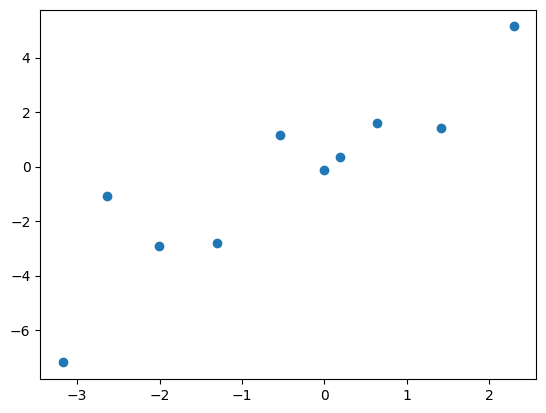

In [37]:
plt.scatter(x1, x2)

In [38]:
# design matrix
x_mat = np.r_[[np.ones(sample_size), x1, x2]].T
x_mat

array([[ 1.00000000e+00, -2.01187291e+00, -2.91222057e+00],
       [ 1.00000000e+00, -2.63470399e+00, -1.08462826e+00],
       [ 1.00000000e+00, -3.45621966e-03, -1.32250309e-01],
       [ 1.00000000e+00,  1.42114019e+00,  1.43156072e+00],
       [ 1.00000000e+00, -1.29916782e+00, -2.81724102e+00],
       [ 1.00000000e+00,  6.34706116e-01,  1.58422227e+00],
       [ 1.00000000e+00,  1.94133559e-01,  3.52859149e-01],
       [ 1.00000000e+00, -3.17538408e+00, -7.19263596e+00],
       [ 1.00000000e+00, -5.38060143e-01,  1.16017797e+00],
       [ 1.00000000e+00,  2.29880170e+00,  5.14260349e+00]])

In [39]:
# true coefficients
beta = np.array([1, 1, 1])

# std of error term
sigma = 1.5

In [40]:
# 誤差項を変えて複数回試行し、推定量の分布を求める。

n_iter = 1000
list_beta_hat = []

x_pinv = np.linalg.pinv(x_mat) # Moore-Penrose inverse
for i in range(0, n_iter):
  eps_vec = np.random.randn(sample_size) * sigma
  y = np.dot(x_mat, beta) + eps_vec
  beta_hat = np.dot(x_pinv, y)
  list_beta_hat.append(beta_hat)

beta_hat_samples = np.array(list_beta_hat)

In [41]:
beta_hat_samples.mean(0)

array([1.02397936, 1.0291584 , 0.97843614])

In [42]:
def plot_line(func, x_min, x_max, ax, **args):
  _x = x_min + (x_max - x_min) * np.arange(0, 1, 1/20)
  _y = func(_x)

  return ax.plot(_x, _y, **args)

In [43]:
cov = sigma ** 2 * (x_pinv @ x_pinv.T)[1:, 1:]

cov_eig_val, cov_eig_vec = np.linalg.eig(cov)
cov_eig_val, cov_eig_vec

(array([0.47696542, 0.01824998]),
 array([[ 0.89561541,  0.44482923],
        [-0.44482923,  0.89561541]]))

Text(0, 0.5, '$\\hat{\\beta}_2$')

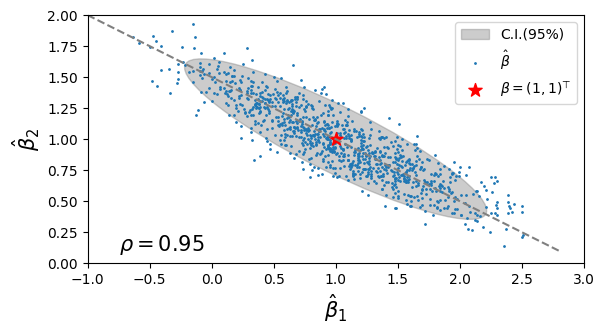

In [56]:
x_min = -1.0
x_max = 3.0

beta_hat_samples = np.array(list_beta_hat)
beta1_hat = beta_hat_samples[:, 1]
beta2_hat = beta_hat_samples[:, 2]

fig, ax = plt.subplots()
ax.set_box_aspect(0.5)

z_alpha = norm.ppf(0.975)
ellipse_width = np.sqrt(cov_eig_val[0]) * z_alpha * 2
ellipse_height = np.sqrt(cov_eig_val[1]) * z_alpha * 2
ellipse_angle = np.arctan2(cov_eig_vec[1,0], cov_eig_vec[0,0]) / np.pi * 180

ellipse = Ellipse((1,1), width=ellipse_width, height=ellipse_height, angle=ellipse_angle, color="gray", alpha=0.4, label="C.I.(95%)")
ax.add_patch(ellipse)

plot_line(lambda x: -0.5*x + 1.5, x_min, x_max, ax, ls="--", color="gray")

ax.scatter(x=beta1_hat, y=beta2_hat, s=1, label="$\\hat{\\beta}$")

ax.scatter(beta[1], beta[2], color="red", s=100, marker="*", label="$\\beta=(1,1)^\\top$")

ax.text(-0.75,0.1, "$\\rho={}$".format(rho), fontsize=15)

ax.legend()

ax.set_xlim(x_min, x_max)
ax.set_ylim(0,(x_max - x_min) * 0.5)

ax.set_xlabel("$\\hat{\\beta}_1$", fontsize="15")
ax.set_ylabel("$\\hat{\\beta}_2$", fontsize="15")